# Importing Libraries And Displaying The Data

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [205]:
file_path = '/content/Salaries.csv'
dataset = pd.read_csv(file_path)
dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [206]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [207]:
dataset.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


#Task 1


Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [208]:
# number of rows
rows, cols = dataset.shape

print(f"The Dataset Has a {rows} rows and a {cols} columns")

The Dataset Has a 148654 rows and a 13 columns


In [209]:
# the data types of each column
data_types = dataset.dtypes
print("The Data Types Of Each Column: ")
data_types

The Data Types Of Each Column: 


Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [210]:
# This is a function that calculate the missing values of the dataset
def missing_values_percentage_fun(dataset):
  ''' This function calculates the missing values of the dataset '''
  missing_values = [np.nan, "", " ", None]
  missing_values_percentage = dataset.isin(missing_values).mean().sort_values(ascending=False) * 100
  return missing_values_percentage

In [211]:
# missing values in each column
missing_values_percentage = missing_values_percentage_fun(dataset)
print(missing_values_percentage)

Notes               100.000000
Status              100.000000
Benefits             24.326961
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Agency                0.000000
dtype: float64


#Task 2

Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


In [212]:
# basic statistic
dataset.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [213]:
# mean, median, mode, minimum, and maximum salary
salary_mean = dataset['TotalPayBenefits'].mean()
salary_median = dataset['TotalPayBenefits'].median()
salary_mode = dataset['TotalPayBenefits'].mode().values[0]
min_salary = dataset['TotalPayBenefits'].min()
max_salary = dataset['TotalPayBenefits'].max()

print('Discriptive Statistics On The Salary: ')
print(f"The Mean Of The Salary is: {salary_mean}")
print(f"The Median Of The Salary is: {salary_median}")
print(f"The Mode Of The Salary is: {salary_mode}")
print(f"The Minimum Salary is: {min_salary}")
print(f"The Maximum Salary is: {max_salary}")

Discriptive Statistics On The Salary: 
The Mean Of The Salary is: 93692.55481056681
The Median Of The Salary is: 92404.09
The Mode Of The Salary is: 7959.18
The Minimum Salary is: -618.13
The Maximum Salary is: 567595.43


In [214]:
# range of salaries
salary_range = max_salary - abs(min_salary)
print(f"the Range Of The Salary Is: {salary_range}")

the Range Of The Salary Is: 566977.3


In [215]:
# standard deviation of salaries
salary_std = dataset['TotalPayBenefits'].std()
print(f"The standard deviation Of The Salaties Is: {salary_std}")

The standard deviation Of The Salaties Is: 62793.533483237705


#Task 3


Handle missing data by suitable method with explain why you use it.

In [216]:
# drop the columns with 100% missing values
columns_to_drop = ['Notes', 'Status']
dataset.drop(columns=columns_to_drop, inplace=True)
dataset.head()
# I droped the ['Notes', 'Status'] columns because they had a percentage of 100% missing data
#  and in this case droping them is the better option

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [217]:
# this is a function that takes the name of the column and perform some basic EDA

def basic_eda(column_name, num_of_rows):
  ''' This function performs some basic EDA '''

  # displaying a sample data from the column
  print(dataset[column_name].head(num_of_rows))
  print("\n\n\n")

  # displaying the number of unique values in the column and a sample of them
  unique_values = dataset[column_name].unique()
  print(f"Number Of Unique Values : {len(unique_values)}")
  if len(unique_values) >= 50:
    print("First 50 Unique Values :")
    for ind in range(50):
      print(unique_values[ind])
    print("\n\n\n")

  # Check if there are any correlations between the column and other numerical
  #  columns in the dataset using correlation coefficients.
  correlation_matrix = dataset.corr()
  column_correlation = correlation_matrix[column_name].sort_values(ascending=False)
  print(f"This Is How {column_name} Correlate To Other Numerical Columns: ")
  print(column_correlation)

In [218]:
# filling the Benefits column with data
#  invoking the basic_eda function to understand the data
basic_eda('Benefits', 10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Benefits, dtype: float64




Number Of Unique Values : 98466
First 50 Unique Values :
nan
44430.12
69810.19
53102.29
72047.88
44438.25
84681.82
82001.94
81824.37
24287.23
58486.1
49648.09
53249.56
52320.9
55353.92
32381.0
60285.44
73017.12
64702.72
67667.09
72286.35
56202.98
45129.03
59265.59
68783.23
80999.77
49571.51
80660.61
45978.15
79477.91
75003.33
28907.03
55722.16
52943.62
80986.55
24941.13
74698.5
24688.54
57576.73
56561.05
42919.16
41230.89
78554.11
53207.72
23607.08
68106.81
60298.97
77382.62
43913.33
53152.06




This Is How Benefits Correlate To Other Numerical Columns: 
Benefits            1.000000
TotalPayBenefits    0.930140
BasePay             0.918028
TotalPay            0.884097
OvertimePay         0.301207
OtherPay            0.233178
Year               -0.043136
Id                 -0.348957
Name: Benefits, dtype: float64


<ipython-input-217-3b84d677d1bc>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [219]:
# after the eda and understanding the dataset and the column "Benefits" I am going to fill the
#  missing data of the column based of the column that has the most crrelation with which is TotalPayBenefits
#  since it has 0 missing values too. I will implement a basic Linear Regression Model that can predict the missing
#  value based on the Correlated column(TotalPayBenefits).

# identifiyng the correlated variable
correlated_variable = dataset['TotalPayBenefits']
benefits_column = dataset['Benefits']

# identifying missing values of Benefits
missing_values = benefits_column.isnull()

# createing a training dataset for the model
training_data = pd.DataFrame({'CorrelatedVariable' : correlated_variable[~missing_values],
                           'Benefits': benefits_column[~missing_values]})

# createing a dataframe for the prediction using the correlated variable
predict_data = pd.DataFrame({'CorrelatedVariable': correlated_variable[missing_values]})

# instantiateing and fitting the linear regression model
model = LinearRegression()
model.fit(training_data[['CorrelatedVariable']], training_data['Benefits'])

# predicting the missing values
predicted_values = model.predict(predict_data[['CorrelatedVariable']])

# filling the missing values of the Benefits column with the predicted values
benefits_column[missing_values] = predicted_values

# updateing the original dataset
dataset['Benefits'] = benefits_column

<ipython-input-219-f2a5e77bb97c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benefits_column[missing_values] = predicted_values


In [220]:
type(dataset)

pandas.core.frame.DataFrame

In [221]:
# checking if the code worked and filled all of the mising values
missing_values_percentage = missing_values_percentage_fun(dataset)
print(missing_values_percentage)

BasePay             0.409676
OvertimePay         0.002691
OtherPay            0.002691
Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Agency              0.000000
dtype: float64


In [222]:
# now lets do the same for the BasePay, OvertimePay and OtherPay columns
#  first: the BasePay column
# A) Basic EDA
basic_eda('BasePay', 10)

0    167411.18
1    155966.02
2    212739.13
3     77916.00
4    134401.60
5    118602.00
6     92492.01
7    256576.96
8    176932.64
9    285262.00
Name: BasePay, dtype: float64




Number Of Unique Values : 109490
First 50 Unique Values :
167411.18
155966.02
212739.13
77916.0
134401.6
118602.0
92492.01
256576.96
176932.64
285262.0
194999.39
99722.0
294580.02
271329.03
174872.64
198778.01
268604.57
140546.87
168692.63
257510.59
257510.48
257510.44
140546.88
140546.86
256470.41
92080.8
168692.59
261717.6
246225.6
234325.02
254027.63
248895.7
104861.39
177781.25
101953.2
245124.44
110661.2
132202.26
147158.85
168692.66
218930.76
123013.02
196081.86
249375.02
168692.64
248895.77
233867.6
137729.92
246305.62
140546.89




This Is How BasePay Correlate To Other Numerical Columns: 
BasePay             1.000000
TotalPay            0.954494
TotalPayBenefits    0.946595
Benefits            0.906788
OtherPay            0.285655
OvertimePay         0.266740
Year                0.033751
Id      

<ipython-input-217-3b84d677d1bc>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [223]:
# B) The Choosen Methode For Filling The Missing Data
# after the eda and understanding the dataset and the column "BasePay" I am going use the same method
#  used to fill the missing values of the column "Benefits" which seems (for me) the better choice at the moment

# identifiyng the correlated variable
correlated_variable = dataset['TotalPay']
basePay_column = dataset['BasePay']

# identifying missing values of Benefits
missing_values = basePay_column.isnull()

# createing a training dataset for the model
training_data = pd.DataFrame({'CorrelatedVariable' : correlated_variable[~missing_values],
                           'BasePay': basePay_column[~missing_values]})

# createing a dataframe for the prediction using the correlated variable
predict_data = pd.DataFrame({'CorrelatedVariable': correlated_variable[missing_values]})

# instantiateing and fitting the linear regression model
model = LinearRegression()
model.fit(training_data[['CorrelatedVariable']], training_data['BasePay'])

# predicting the missing values
predicted_values = model.predict(predict_data[['CorrelatedVariable']])

# filling the missing values of the Benefits column with the predicted values
basePay_column[missing_values] = predicted_values

# updateing the original dataset
dataset['BasePay'] = basePay_column

<ipython-input-223-4b60c889468a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basePay_column[missing_values] = predicted_values


In [224]:
# checking if the code worked and filled all of the mising values
missing_values_percentage = missing_values_percentage_fun(dataset)
print(missing_values_percentage)

OvertimePay         0.002691
OtherPay            0.002691
Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.000000
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Agency              0.000000
dtype: float64


In [225]:
# Second: the OvertimePay column
basic_eda('OvertimePay', 10)

0         0.00
1    245131.88
2    106088.18
3     56120.71
4      9737.00
5      8601.00
6     89062.90
7         0.00
8     86362.68
9         0.00
Name: OvertimePay, dtype: float64




Number Of Unique Values : 65999
First 50 Unique Values :
0.0
245131.88
106088.18
56120.71
9737.0
8601.0
89062.9
86362.68
71344.88
87082.62
74050.3
73478.2
119397.26
69626.12
880.16
377.21
93200.58
77896.14
97868.77
40008.0
80706.88
50227.61
59924.97
139102.95
31162.04
52648.92
64985.85
60847.56
59760.9
4078.0
111729.65
66199.23
89856.01
58084.86
77937.25
73207.61
82428.76
105028.94
9161.31
99584.94
7437.0
80411.9
54342.28
66977.63
37873.61
36644.57
66596.28
104632.95
5477.62
118949.93




This Is How OvertimePay Correlate To Other Numerical Columns: 
OvertimePay         1.000000
TotalPay            0.504859
TotalPayBenefits    0.467981
Benefits            0.325684
OtherPay            0.316592
BasePay             0.268028
Year                0.027887
Id                 -0.081505
Name: OvertimePay, dtyp

<ipython-input-217-3b84d677d1bc>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [226]:
# B) The Choosen Methode For Filling The Missing Data
# in the case of "OvertimePay" the correlation with other columns is somewhat modirate and not considered
#  a strong moderate so the previuse methode of using a MAchine Learning model and predicting the missing
#  values will not provide much of a help and because I am not an employee of the company this dataset has
#  come from and I do not have a superviser to ask him to further my understanding of the dataset I will
#  just implement the missing values of this column using the mean of it

dataset['OvertimePay'].fillna(dataset['OvertimePay'].mean(), inplace=True)

In [227]:
# checking if the code worked and filled all of the mising values
missing_values_percentage = missing_values_percentage_fun(dataset)
print(missing_values_percentage)

OtherPay            0.002691
Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.000000
OvertimePay         0.000000
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Agency              0.000000
dtype: float64


In [228]:
# Third: the OtherPay OtherPay
# A) Basic EDA
basic_eda('OtherPay', 10)

0    400184.25
1    137811.38
2     16452.60
3    198306.90
4    182234.59
5    189082.74
6    134426.14
7     51322.50
8     40132.23
9     17115.73
Name: OtherPay, dtype: float64




Number Of Unique Values : 83226
First 50 Unique Values :
400184.25
137811.38
16452.6
198306.9
182234.59
189082.74
134426.14
51322.5
40132.23
17115.73
33149.9
110804.3
0.0
21342.59
37424.11
13957.65
16115.86
18625.08
38115.47
16159.5
16679.79
15883.56
39955.25
24083.86
31909.28
11522.18
133695.76
16063.99
2357.0
15140.54
25972.64
5899.48
10789.18
103499.39
20658.0
16483.94
12000.0
111446.2
67083.83
39540.46
21055.17
21954.96
27330.59
15575.26
54040.18
14401.43
14851.04
20848.46
20477.16
26203.69




This Is How OtherPay Correlate To Other Numerical Columns: 
OtherPay            1.000000
TotalPay            0.470496
TotalPayBenefits    0.422341
OvertimePay         0.316592
BasePay             0.284184
Benefits            0.271660
Year               -0.002499
Id                 -0.100403
Name: OtherPay, dty

<ipython-input-217-3b84d677d1bc>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [229]:
# B) The Choosen Methode For Filling The Missing Data
# for the same reasons shown in filling the missing values of the column "OvertimePay" I will choose to
#  fill the missing data of the column "OtherPay" in the same way using the mean

dataset['OtherPay'].fillna(dataset['OtherPay'].mean(), inplace=True)

In [230]:
# checking if the code worked and filled all of the mising values
missing_values_percentage = missing_values_percentage_fun(dataset)
print(missing_values_percentage)

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Agency              0.0
dtype: float64


#Task 4


Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

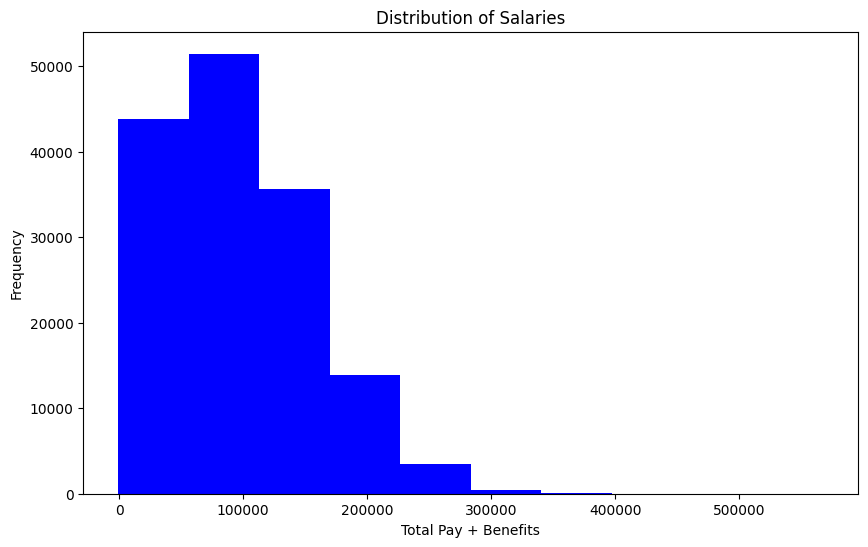

In [231]:
# bar chart visualising the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(dataset['TotalPayBenefits'], color="blue")
plt.title("Distribution of Salaries")
plt.xlabel('Total Pay + Benefits')
plt.ylabel('Frequency')
plt.show()

In [232]:
# I extracted a new column named "department" based on the column "Jobtitle" for this task and I ignored
#  the rows that did not have a department name part due to my lack of knowledge about this dataset but in a real life
#  dcenario I would reach out to my supervisers and to the stackholders to further my knowledge and make the right choice

# Function to extract department name
def extract_department(job_title):
    # Split the job title based on '(' and take the second part (if it exists)
    parts = job_title.split('(')
    if len(parts) > 1:
        return parts[1].split(')')[0].strip()
    else:
        return None

# Apply the function to create the new "department" column
dataset['department'] = dataset['JobTitle'].apply(extract_department)

# Display the resulting DataFrame
dataset.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,department
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,127233.360942,567595.43,567595.43,2011,San Francisco,None
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,120951.921643,538909.28,538909.28,2011,San Francisco,POLICE DEPARTMENT
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,76362.964002,335279.91,335279.91,2011,San Francisco,POLICE DEPARTMENT
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,75719.999009,332343.61,332343.61,2011,San Francisco,None
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,74412.649267,326373.19,326373.19,2011,San Francisco,FIRE DEPARTMENT
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,72203.788724,316285.74,316285.74,2011,San Francisco,None
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,72137.070404,315981.05,315981.05,2011,San Francisco,FIRE DEPARTMENT
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,70367.435335,307899.46,307899.46,2011,San Francisco,None
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,69388.216052,303427.55,303427.55,2011,San Francisco,FIRE DEPARTMENT
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,69158.335758,302377.73,302377.73,2011,San Francisco,FIRE DEPARTMENT


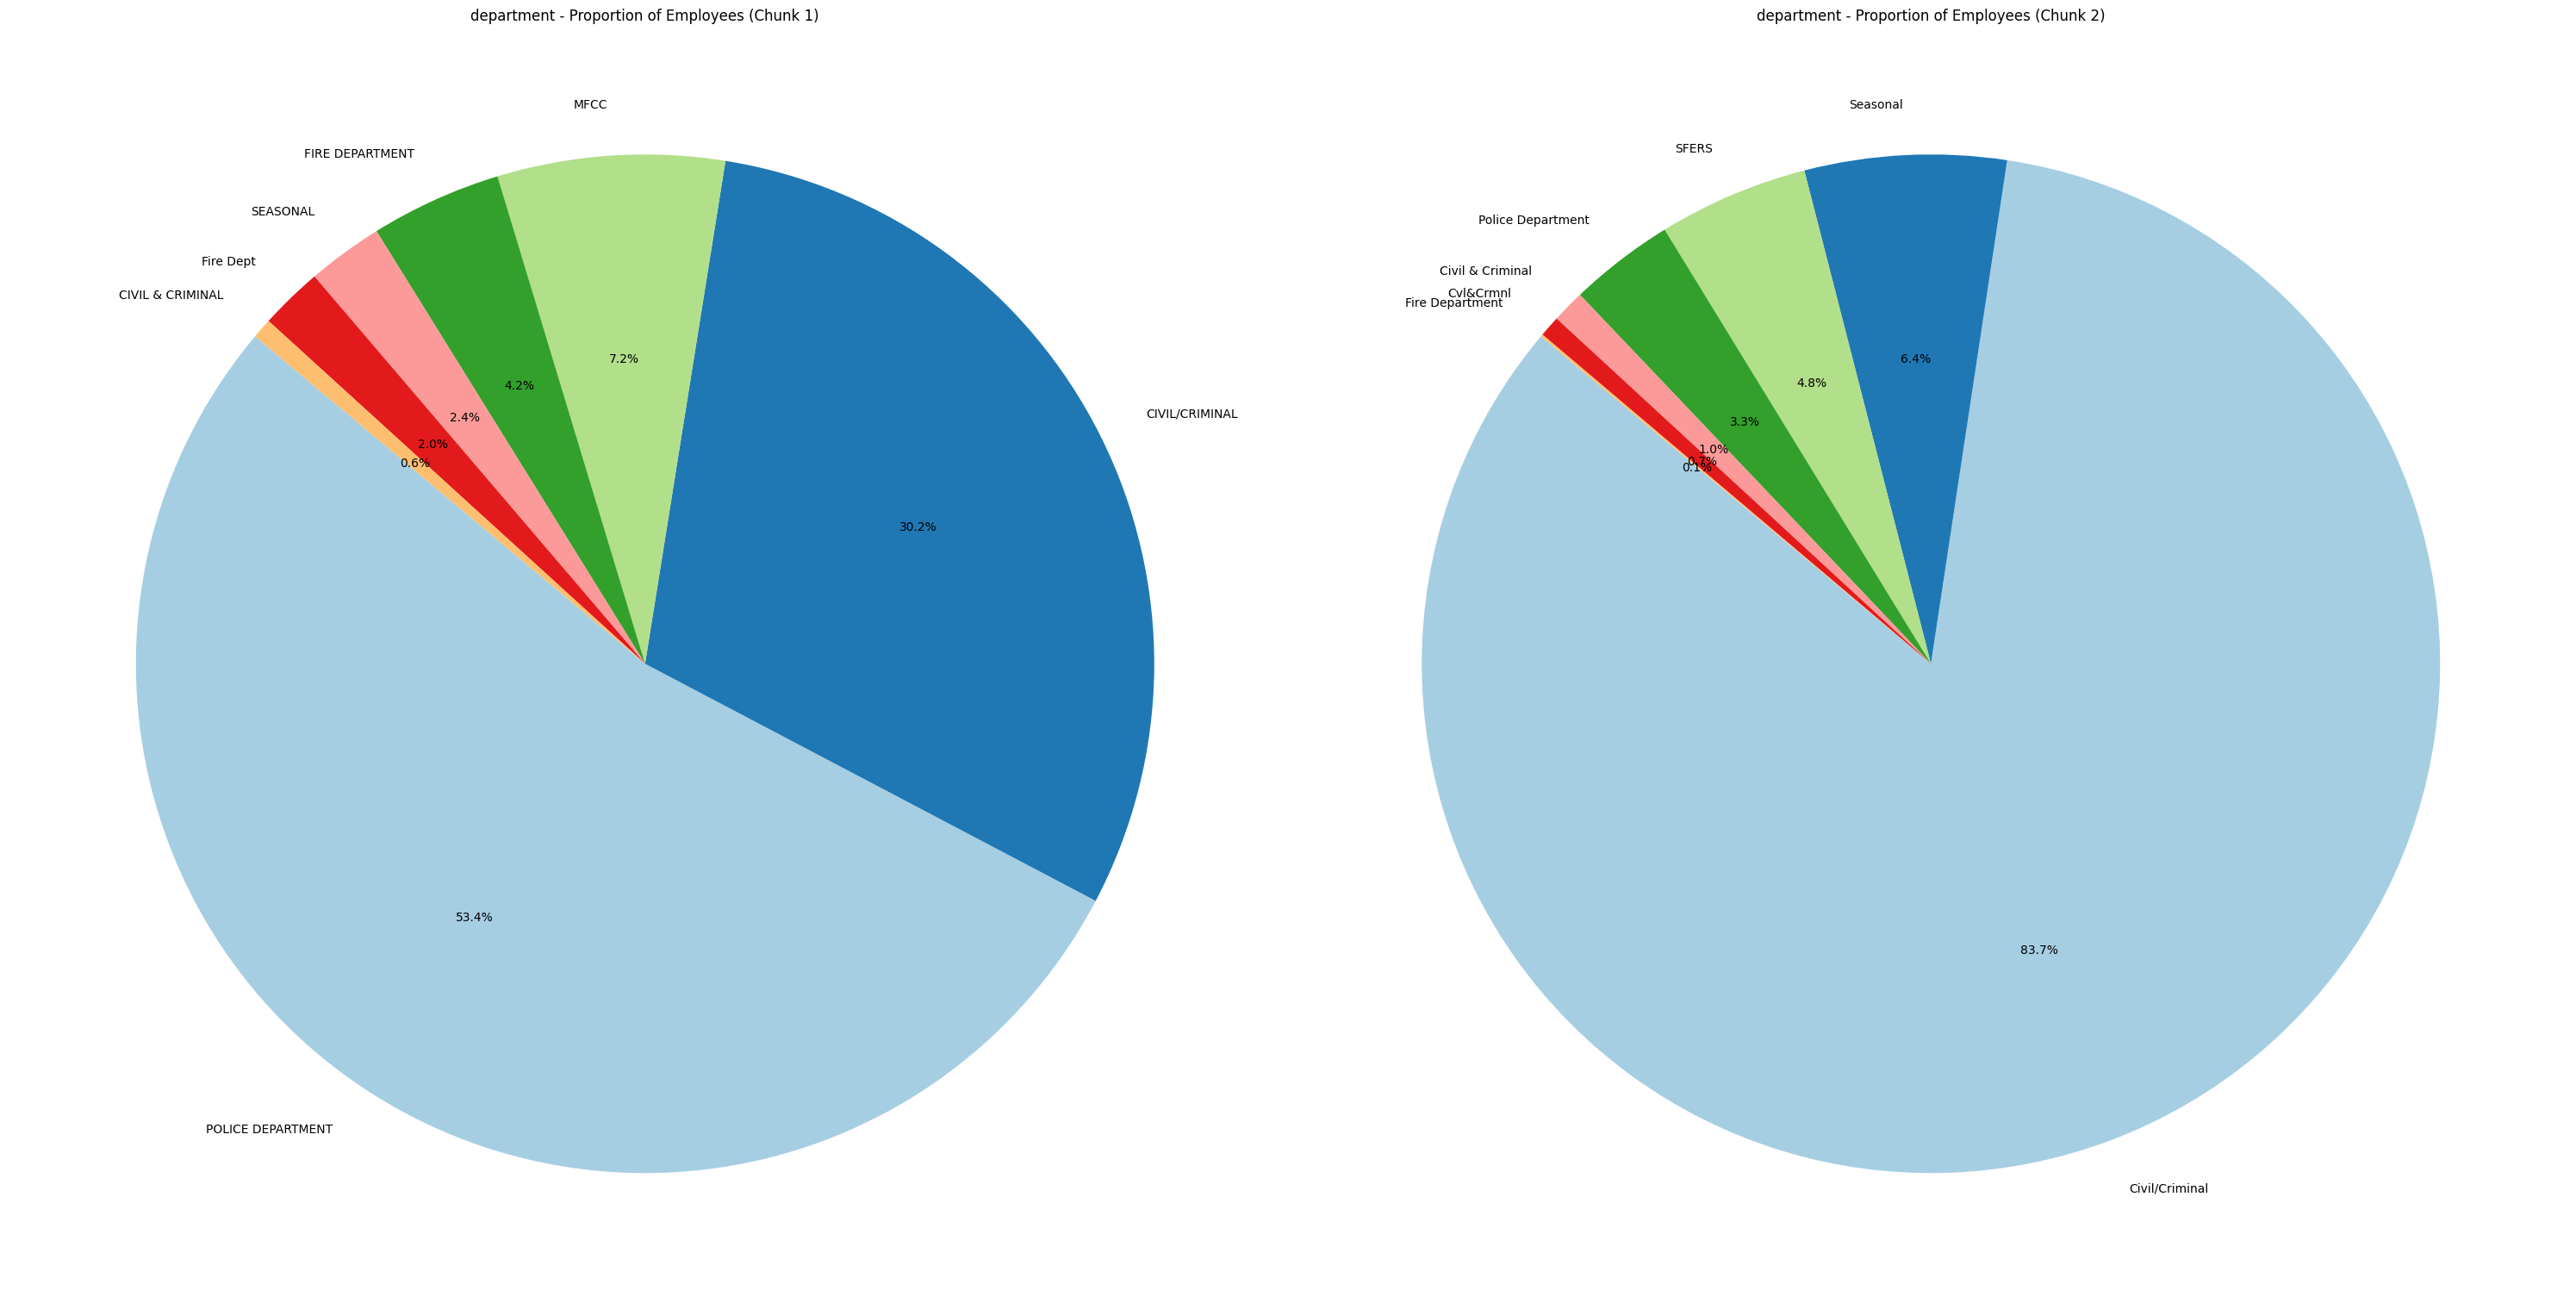

In [233]:
# for the same reason stated befor I will only consider the Job title that has the name of the department as a
#  part of it and ignore the rest

# Get unique job titles
unique_departments = dataset['department'].unique()

# Determine the number of pie charts needed
chunk_size = 8
num_chunks = len(unique_departments) // chunk_size + 1

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(30, 23))

# Create pie charts for the first two chunks
for i in range(2):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk_job_titles = unique_departments[start_idx:end_idx]

    # Filter the DataFrame for the current chunk
    chunk_df = dataset[dataset['department'].isin(chunk_job_titles)]

    # Get department counts for the chunk
    department_counts = chunk_df['department'].value_counts()

    # Create a pie chart for the chunk
    axes[i].pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(f'department - Proportion of Employees (Chunk {i + 1})')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#Task 5

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [234]:
dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,department
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.180000,0.000000,400184.250000,127233.360942,567595.43,567595.43,2011,San Francisco,None
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.020000,245131.880000,137811.380000,120951.921643,538909.28,538909.28,2011,San Francisco,POLICE DEPARTMENT
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.130000,106088.180000,16452.600000,76362.964002,335279.91,335279.91,2011,San Francisco,POLICE DEPARTMENT
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.000000,56120.710000,198306.900000,75719.999009,332343.61,332343.61,2011,San Francisco,None
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.600000,9737.000000,182234.590000,74412.649267,326373.19,326373.19,2011,San Francisco,FIRE DEPARTMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.000000,0.000000,0.000000,0.000000,0.00,0.00,2014,San Francisco,None
148650,148651,Not provided,Not provided,5548.442667,5066.059886,3648.767297,2946.336013,0.00,0.00,2014,San Francisco,None
148651,148652,Not provided,Not provided,5548.442667,5066.059886,3648.767297,2946.336013,0.00,0.00,2014,San Francisco,None
148652,148653,Not provided,Not provided,5548.442667,5066.059886,3648.767297,2946.336013,0.00,0.00,2014,San Francisco,None


In [235]:
missing_values_percentage = missing_values_percentage_fun(dataset)
print(missing_values_percentage)

department          98.255008
Id                   0.000000
EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.000000
OvertimePay          0.000000
OtherPay             0.000000
Benefits             0.000000
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
Agency               0.000000
dtype: float64


In [236]:
temp_dataset = dataset.copy().dropna()
temp_dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,department
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,120951.921643,538909.28,538909.28,2011,San Francisco,POLICE DEPARTMENT
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,76362.964002,335279.91,335279.91,2011,San Francisco,POLICE DEPARTMENT
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,74412.649267,326373.19,326373.19,2011,San Francisco,FIRE DEPARTMENT
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,72137.070404,315981.05,315981.05,2011,San Francisco,FIRE DEPARTMENT
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,69388.216052,303427.55,303427.55,2011,San Francisco,FIRE DEPARTMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
148486,148487,Thornton C Bunch,Attorney (Civil/Criminal),169.28,0.00,0.00,1.690000,169.28,170.97,2014,San Francisco,Civil/Criminal
148493,148494,Lindsay B Hoopes,Attorney (Civil/Criminal),0.00,0.00,160.08,0.000000,160.08,160.08,2014,San Francisco,Civil/Criminal
148548,148549,Jill Sprague,Attorney (Civil/Criminal),0.00,0.00,87.12,0.000000,87.12,87.12,2014,San Francisco,Civil/Criminal
148567,148568,Erin D Haney,Attorney (Civil/Criminal),0.00,0.00,61.43,0.000000,61.43,61.43,2014,San Francisco,Civil/Criminal


In [237]:
# grouping the data by "department" and "Year" and calculating summary statistics for it
group_by_department = temp_dataset.groupby(['department', 'Year'])['TotalPayBenefits'].mean().reset_index()
department_summery_statisics = group_by_department['TotalPayBenefits'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print(department_summery_statisics)
print(group_by_department.nunique())
# print(group_by_department.unique())

14
['POLICE DEPARTMENT' 'FIRE DEPARTMENT' 'CIVIL & CRIMINAL' 'CIVIL/CRIMINAL'
 'MFCC' 'SEASONAL' 'Fire Dept' 'Cvl&Crmnl' 'Civil & Criminal' 'SFERS'
 'Police Department' 'Civil/Criminal' 'Seasonal' 'Fire Department']




    index  TotalPayBenefits
0    mean     174833.678637
1  median     180491.606042
2     min       7488.975667
3     max     359919.583750
4   count         28.000000
department          14
Year                 4
TotalPayBenefits    28
dtype: int64


In [238]:
# grouping the data by "JobTitle" and "Year" and calculating summary statistics for it
group_by_job_title = temp_dataset.groupby(['JobTitle', 'Year'])['TotalPayBenefits'].mean().reset_index()
department_summery_statisics = group_by_job_title['TotalPayBenefits'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print(department_summery_statisics)
print(group_by_job_title.nunique())
# print(group_by_department.unique())

45
['CAPTAIN III (POLICE DEPARTMENT)'
 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)'
 'BATTALION CHIEF, (FIRE DEPARTMENT)'
 'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)'
 'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)'
 'COMMANDER III, (POLICE DEPARTMENT)'
 'DEPUTY CHIEF III (POLICE DEPARTMENT)'
 'INSPECTOR III, (POLICE DEPARTMENT)' 'LIEUTENANT III (POLICE DEPARTMENT)'
 'CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)'
 'SERGEANT III (POLICE DEPARTMENT)' 'CHIEF ATTORNEY I (CIVIL & CRIMINAL)'
 'SERGEANT I (POLICE DEPARTMENT)'
 'ASSISTANT INSPECTOR (POLICE DEPARTMENT)'
 'ASSISTANT INSPECTOR III (POLICE DEPARTMENT)' 'ATTORNEY (CIVIL/CRIMINAL)'
 'SERGEANT II (POLICE DEPARTMENT)'
 'ASSISTANT INSPECTOR II (POLICE DEPARTMENT)'
 'INSPECTOR, (POLICE DEPARTMENT)' 'LIEUTENANT I, (POLICE DEPARTMENT)'
 'LIEUTENANT II (POLICE DEPARTMENT)' 'INSPECTOR II, (POLICE DEPARTMENT)'
 'MARRIAGE, FAMILY & CHILD COUNSELOR (MFCC)'
 'SENIOR MARRIAGE, FAMILY & CHILD COUNSELOR (MFCC)'
 'WATERSHED WORKER (SEASONAL)

In [239]:
# creating a new dataframe to compare the average salary between the two groups
salary_comparision_dataset = pd.DataFrame()

salary_comparision_dataset['Departments Salary'] = group_by_department['TotalPayBenefits']
salary_comparision_dataset['JobTitle Salary'] = group_by_job_title['TotalPayBenefits']

salary_comparision_dataset.head()

,Departments Salary,JobTitle Salary
0,181415.14375,80266.370000
1,128056.73382,203427.850000
2,248837.06000,188999.200000
3,271373.29000,150888.861000
4,248823.51200,152671.215556


#Task 6


Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [242]:
# identifying if there is a correlation between the salary("TotalPayBenefits") and other numerical columns
correlation_matrix = dataset.corr()
column_correlation = correlation_matrix["TotalPayBenefits"].sort_values(ascending=False)
print("This Is How TotalPayBenefits Correlate To Other Numerical Columns: ")
print(column_correlation)

This Is How TotalPayBenefits Correlate To Other Numerical Columns: 
TotalPayBenefits    1.000000
TotalPay            0.977313
BasePay             0.946987
Benefits            0.941541
OvertimePay         0.467967
OtherPay            0.422328
Year                0.151947
Id                 -0.092190
Name: TotalPayBenefits, dtype: float64


<ipython-input-242-2bd3ef8ea079>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


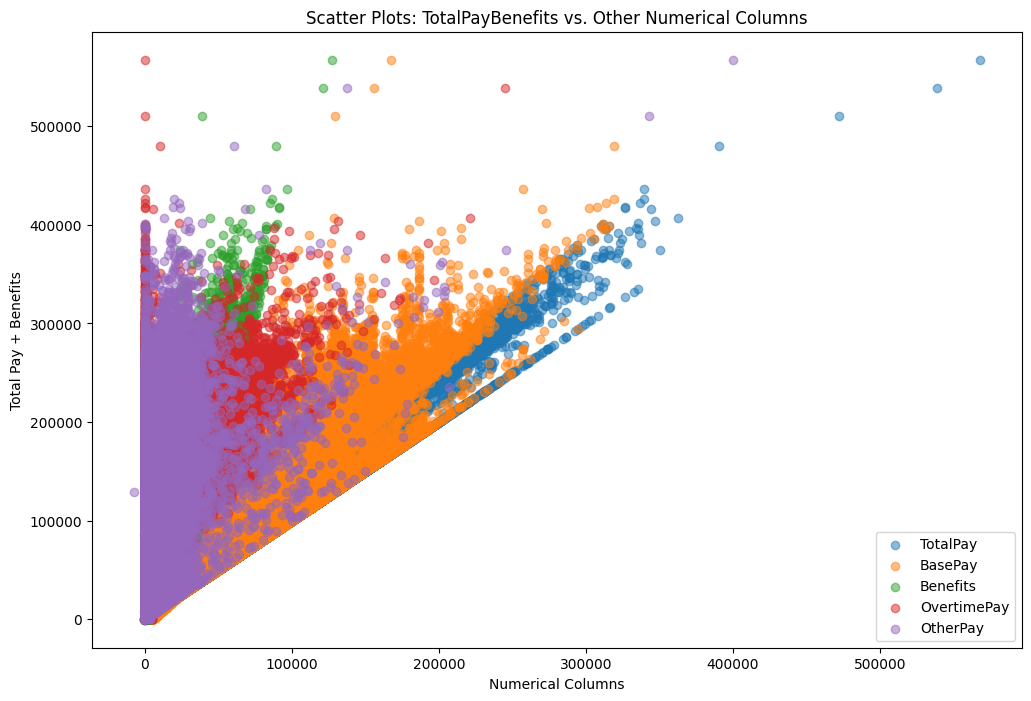

In [254]:
# Scatter plot to visualize the correlations
# Columns with high correlation
high_corr_columns = ['TotalPay', 'BasePay', 'Benefits', 'OvertimePay', 'OtherPay']

# Scatter plots to visualize relationships
plt.figure(figsize=(12, 8))

for column in high_corr_columns:
    plt.scatter(dataset[column], dataset['TotalPayBenefits'], alpha=0.5, label=column)

plt.title('Scatter Plots: TotalPayBenefits vs. Other Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Total Pay + Benefits')
plt.legend()
plt.show()

#Summary of Insights(REPORT)


##Basic Data Exploration:

The dataset contains information about employee salaries, job titles, and related details.

It has columns such as 'Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', and 'Status'.

##Descriptive Statistics:

Basic statistics for the numerical columns were calculated, including mean, median, mode, minimum, maximum, range, and standard deviation.

##Negative Values in Salary Columns:


The dataset may contain negative values in columns such as 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits'. Further investigation is needed to understand the context of these negative values.

##Data Cleaning:

###Droping Columns With High Percentage Of Missing Values:

I dropped the columns ['Notes', 'Status'] due to the fact that they had 100% missing values

##Handling missing data:

The missing values in the ['Benefits', 'BasePay'] column were replaced using a linear regression model based on a correlated variable.

The missing values in the ['OvertimePay', 'OtherPay'] column were replaced by the mean of their columns due to the lack of knowlege about the dataset.

##Exploratory Data Analysis (EDA):

I wrote a simple function that performs some basic EDA named basic_eda and another function that returns the persentage of missing data of each column named missing_values_percentage_fun

##The Column Department:

I extracted a new column named "department" based on the column "Jobtitle" and I ignored the rows that did not have a department name part due to my lack of knowledge about this dataset but in a real life cenario I would reach out to my supervisers and to the stackholders to further my knowledge and understanding and make the right choice


##Visualisations:


I plotted some visualisation as written in the assignment description based on the previuse EDA and analysis

##Grouped Analysis:


Grouping the data by the ['department', 'Year'] columns, summary statistics for the 'TotalPayBenefits' column were calculated, providing insights into the average salaries across different departments throught the years.

Grouping the data by the ['JobTitle', 'Year'] columns, summary statistics for the 'TotalPayBenefits' column were calculated, providing insights into the average salaries across different JobTitle throught the years.

I created a new dataset to compare the salaries between the grouped data

##Simple Correlation Analysis:


I used the correlation coefficients to identify any correlations between the nemerical columns

##Recommendations:


Further investigation is needed to understand the context and reasons behind negative values in salary-related columns.

Careful consideration should be given to the handling of missing values, and alternative imputation methods may be explored based on the dataset characteristics.

Job titles with a small number of occurrences may be grouped or aggregated for better visualization.

Exploring the relationships between different numerical columns can provide additional insights into the factors influencing total pay and benefits.

##Conclusion:

The analysis provides valuable insights into the dataset, offering a foundation for further exploration and decision-making. It highlights areas of interest such as missing value patterns, salary distribution across departments, and the impact of different numerical variables on total pay and benefits. Continuous data quality checks and thorough understanding of the dataset's context are crucial for drawing accurate conclusions and making informed decisions.